In [7]:
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

This notebook will programmaticlly generate a Zemax DAT file based off of the sag equation:
                ![](images/01848_1_SagEquation.png)
                
 
Conic Constants 
* k < –1 hyperbola
* k = –1 hyperbola
* –1 < k < 0 ellipse at major axis (prolate ellipse)
* k> 0  ellipse at minor axis (oblate ellipse)
* k = 0 sphere
 
 See this tutorial for other versions: [https://support.zemax.com/hc/en-us/articles/1500005578182](https://support.zemax.com/hc/en-us/articles/1500005578182)
 

In [54]:
# Focus of a Parabolic Mirror f = Rs/2
"""
So a 50mm would have a Rs of 200mm
"""

# Parameters

radiusOfCurvature = 200

curvature = 1/ radiusOfCurvature

conic = -1

semiDiamter = 50.8

points = 513

resolution = (2*semiDiamter/(points-1))

pointSpacing = (2*semiDiamter)/(resolution-1)



In [55]:
"""def sagEquation(c, semDia, res, k, points):
    sagData = np.zeros((points-1, points-1) )
    print(sagData.shape)
    x_range = np.array (np.arange(-semDia, semDia, res))
    y_range = np.array (np.arange(-semDia, semDia, res))
    print(x_range.shape)
    
    r = np.sqrt(np.square(x_range) + np.square(x_range))
    sagData = (c * np.square(r)) / ( np.full_like(r.shape, 1)  - (np.full_like(r.shape, k-+1) * np.square(np.full_like(r.shape,c)) *  np.square(r)))
    return sagData"""

'def sagEquation(c, semDia, res, k, points):\n    sagData = np.zeros((points-1, points-1) )\n    print(sagData.shape)\n    x_range = np.array (np.arange(-semDia, semDia, res))\n    y_range = np.array (np.arange(-semDia, semDia, res))\n    print(x_range.shape)\n    \n    r = np.sqrt(np.square(x_range) + np.square(x_range))\n    sagData = (c * np.square(r)) / ( np.full_like(r.shape, 1)  - (np.full_like(r.shape, k-+1) * np.square(np.full_like(r.shape,c)) *  np.square(r)))\n    return sagData'

In [56]:
def sagEquation(c, semDia, res, k, points):
    sagData = np.zeros((points-1, points-1) )
    x_range = np.array (np.arange(-semDia, semDia, res))
    y_range = np.array (np.arange(-semDia, semDia, res))
    
    for i, x in enumerate(x_range):
        for j, y in enumerate(y_range):
            r = sqrt((x**2) + (y**2)) 
            sagData[i,j] = (c * (r**2)) / (1  - (k+1) * (c**2) *  (r**2))
    return sagData

In [57]:
sagSurface = sagEquation(curvature, semiDiamter, resolution, conic, points)

<ipython-input-58-4d06db344665>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


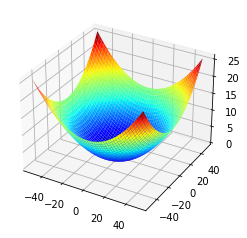

In [58]:
fig = plt.figure()
ax = fig.gca(projection='3d')
x, y = np.meshgrid(np.arange(-semiDiamter, semiDiamter, resolution), np.arange(-semiDiamter, semiDiamter, resolution))

surface = ax.plot_surface(x, y, sagSurface, cmap='jet')

In [73]:
# DAT File Generation
values = np.ravel(sagSurface).copy()

DAT_Text = open("DAT_Text.txt", "a")
DAT_Text.write("{} {} {} {} {} {} {} \n".format(points, points, resolution, resolution, str(0), str(0), str(0)))

for val in values:
    DAT_Text.write("{} {} {} {} \n".format(val, str(0), str(0), str(0), str(0)))   
DAT_Text.close()